In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Condições de contorno
Kim pag 204
- Condições matemáticas que serão adicionadas ao código

- No-flux (não usada):
    - A velocidade na superfície de colisão não pode ter componente normal, apenas componetente paralela. 
      Matemáticamente expresso como:  $\mathbf{u} \cdot \mathbf{n} = 0$

- No-slip (Condição de não deslizamento): 
    - Descreve o comportamento da componente tangencial do fluido
    - Assume que a velocidade na interface fluido sólido é 0, ou seja, zera na direção que bate na borda
    - To implement the no-slip condition, we can assign collider’s velocity to the grid points at and within the collider 
      boundary. (não entendi - ghost cells??)
- Free-slip (não usada):
    - Permite ao fluido se mover livremente sobre as direções tangenciais a colisão
    (não é isso que estamos fazendo)?
    
 - Neumman: 
     - Fixa a derivada daquele ponto em relação a normal
       $ \frac{\partial f}{\partial n} = c$ , para a nossa simulação $c = 0$
       
     - Quando c é 0, sabemos que as bordas tem um valor fixo, pois a derivada de uma constante é 0
     - A condição de no-flux pode ser considerada um subconjunto da condição de Neumman
     
 - Dirichlet (não usada): 
     - Fixa a função daquele ponto, e não a sua derivada
     - Quando a função é a função nula, é igual a condição no-flux
     

## Velocidade 
- Campo de valocidade: vetorial
- Neumman: passa o valor negativo para dar 0 quando formos fazer a df

## Pressão
 - Campo de pressão: escalar 
 - Dirichlet: copia o valor, da 0 na parede quando fazemos a df
     
Before the advection, the code first copies the current velocity field and
lets the advection solver write the new values to the original velocity grid.

In [4]:
def create_Grid(n,sorted):
    x = np.random.randint(0, 10, n) 
    y = np.random.randint(0, 10, n)
    if sorted == 1:
        x = np.sort(x)
        y = np.sort(y)
    grid = np.meshgrid(x,y)
    X = grid[0]
    Y = grid[1]
    Z = X + Y
    return Z

def plot_Grid(Z, title):    
    plt.imshow(Z, origin='lower')
    plt.xlabel('i', fontsize=18)
    plt.ylabel('j', fontsize=18)
    plt.title(title)
    plt.colorbar()
    plt.show(True)
    return

In [5]:
def set_bnd(b, Z): # altera a velocidade em u, v (velocidade) e pressão
    '''N = len grid
        b = 1 -> velocidade 
        b = 2 -> pressão'''
    N = len(Z[0]) - 1    
    print(Z)
    if b == 1: # Neumman - repete negativo na horizontal (v)
        Z[0, 1: -1] = - Z[1,1: -1]
        Z[-1, 1:-1] = - Z[N, 1: -1]
#         print("u -> x")
        print("horizontal")
    else: # Pressão: copia o valor
        Z[0, 1:-1] = Z[1, 1:-1]
        Z[-1, 1:-1] = Z[N, 1:-1]
        print("pressão")
    if b == 2: 
        Z[1:-1,  0] = -Z[1:-1, 1]
        Z[1:-1, -1] = -Z[1:-1, N]
#          print("v -> y")
        print("vertical")
    else:
        Z[1:-1,  0] = Z[1:-1, 1]
        Z[1:-1, -1] = Z[1:-1, N]
       

    Z[ 0,  0] = 0.5 * (Z[1,  0] + Z[ 0, 1])
    Z[ 0, -1] = 0.5 * (Z[1, -1] + Z[ 0, N])
    Z[-1,  0] = 0.5 * (Z[N,  0] + Z[-1, 1])
    Z[-1, -1] = 0.5 * (Z[N, -1] + Z[-1, N])
    
    return Z

[[  3   3  10  10  10   3   9   9   7  -3]
 [  3   3  10  10  10   3   9   9   7  -7]
 [  9   9  16  16  16   9  15  15  13 -13]
 [  4   4  11  11  11   4  10  10   8  -8]
 [  3   3  10  10  10   3   9   9   7  -7]
 [ 11  11  18  18  18  11  17  17  15 -15]
 [  2   2   9   9   9   2   8   8   6  -6]
 [ 10  10  17  17  17  10  16  16  14 -14]
 [  7   7  14  14  14   7  13  13  11 -11]
 [ -6  -9 -16 -16 -16  -9 -15 -15 -13  13]]
horizontal


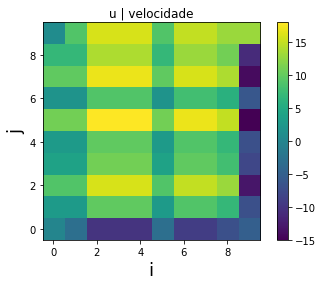

In [12]:
Z = set_bnd(1, Z)
plot_Grid(Z, "u | velocidade")

[[  0  -3 -10 -10 -10  -3  -9  -9  -7  -5]
 [  3   3  10  10  10   3   9   9   7  -7]
 [  9   9  16  16  16   9  15  15  13 -13]
 [  4   4  11  11  11   4  10  10   8  -8]
 [  3   3  10  10  10   3   9   9   7  -7]
 [ 11  11  18  18  18  11  17  17  15 -15]
 [  2   2   9   9   9   2   8   8   6  -6]
 [ 10  10  17  17  17  10  16  16  14 -14]
 [  7   7  14  14  14   7  13  13  11 -11]
 [  1   9  16  16  16   9  15  15  13  13]]
pressão
vertical


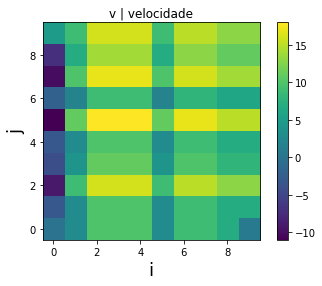

In [13]:
Z = set_bnd(2,Z)
plot_Grid(Z,"v | velocidade")

[[ 3  3 10 10 10  3  9  9  7  4]
 [ 3  3 10 10 10  3  9  9  7  7]
 [ 9  9 16 16 16  9 15 15 13 13]
 [ 4  4 11 11 11  4 10 10  8  8]
 [ 3  3 10 10 10  3  9  9  7  7]
 [11 11 18 18 18 11 17 17 15 15]
 [ 2  2  9  9  9  2  8  8  6  6]
 [10 10 17 17 17 10 16 16 14 14]
 [ 7  7 14 14 14  7 13 13 11 11]
 [ 7  9 16 16 16  9 15 15 13 13]]
pressão


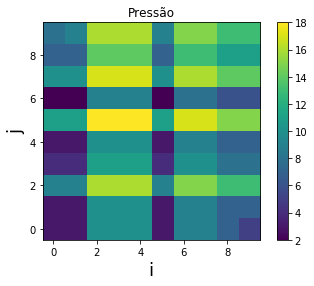

In [15]:
Z = set_bnd(0,Z)
plot_Grid(Z,"Pressão")